# Making intelligent decisions with Decision Trees

### Introduction : 

In this blog we will discuss a Machine Learning Algorithm called Decision Tree. The goal of the blogpost is to get the beginners started with fundamental concepts of a Decision Tree and quickly help them to develop their first tree model in no time.  

Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems.

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences. It is one way to display an algorithm that only contains conditional control statements.

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute , each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

It works for both categorical and continuous input and output variables.


### Types of Decision Trees

Types of decision tree is based on the type of target variable we have. It can be of two types:

#### Categorical Variable Decision Tree:
Decision Tree which has categorical target variable then it called as categorical variable decision tree. 

#### Continuous Variable Decision Tree:
Decision Tree which has continuous target variable then it is called as Continuous Variable Decision Tree.


#### Example:-
Let’s say we have a problem to predict whether a bike is good or not . This can be judged by using decision tree classifier.
However to qualify the bike into good or bad category mileage is an important factor. Mileage is measured using a contiguous value hence it can be measured using the decision tree regressor. 

<img src="./images/dt_.jpg">

<img src="./images/dt_2.gif">


### Important Terminology related to Decision Trees
Let’s look at the basic terminology used with Decision trees:

#### Root Node:
It represents entire population or sample and this further gets divided into two or more homogeneous sets.

#### Splitting:
It is a process of dividing a node into two or more sub-nodes.

#### Decision Node:
When a sub-node splits into further sub-nodes, then it is called decision node.

#### Leaf/ Terminal Node:
Nodes do not split is called Leaf or Terminal node.

#### Pruning:
When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.

#### Branch / Sub-Tree:
A sub-section of entire tree is called branch or sub-tree.

#### Parent and Child Node:
A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.


### How to split nodes
The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria is different for classification and regression trees. Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.
There are few algorithms to find optimum split. Let's look at the following to understand the mathematics behind. 

### Gini Index
Gini index says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.
It works with categorical target variable “Success” or “Failure”. It performs only Binary splits **Higher the value of Gini higher the homogeneity**. CART (Classification and Regression Tree) uses Gini method to create binary splits.


#### Steps to Calculate Gini for a split
1.	Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure (p^2+q^2).
2.	Calculate Gini for split using weighted Gini score of each node of that split	


### Information gain
We can derive information gain from entropy as **1- Entropy**. Entropy is a way measuring the amount of impurity in a given set of data. It is represented by a formula :
<img src="./images/dt1.png">

where, 'p' is the probability of each individual classes in the split

ID3 (Iterative Dichotomiser 3) algorithm uses entropy to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one.

Enough of theory now let’s dive into the implementation of Decision Tree.

We will use implementation provided by the python machine learning framework known as scikit-learn.
	
 
### Problem Statement : 

To build a Decision Tree model for prediction of car quality given other attributes about the car.

### Data details


==========================================
Title: Car Evaluation Database
==========================================

1. The dataset is available at  http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si), Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was derived from a simple hierarchical
   decision model originally developed for the demonstration of DEX
   (M. Bohanec, V. Rajkovic: Expert system for decision
   making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates
   cars according to the following concept structure:

   CAR                      car acceptability
   
   
   . PRICE                  overall price
   
   
   . . buying               buying price
   
   
   . . maint                price of the maintenance
   
   
   . TECH                   technical characteristics
   
   
   . . COMFORT              comfort
   
   
   . . . doors              number of doors
   
   
   . . . persons            capacity in terms of persons to carry
   
   
   . . . lug_boot           the size of luggage boot
   
   
   . . safety               estimated safety of the car
   

   Input attributes are printed in lowercase. Besides the target
   concept (CAR), the model includes three intermediate concepts:
   PRICE, TECH, COMFORT. Every concept is in the original model
   related to its lower level descendants by a set of examples (for
   these examples sets see http://www-ai.ijs.si/BlazZupan/car.html).

   The Car Evaluation Database contains examples with the structural
   information removed, i.e., directly relates CAR to the six input
   attributes: buying, maint, doors, persons, lug_boot, safety.

   Because of known underlying concept structure, this database may be
   particularly useful for testing constructive induction and
   structure discovery methods.

5. Number of Instances: 1728
   (instances completely cover the attribute space)

6. Number of Attributes: 6

7. Attribute Values:

   buying     :  v-high, high, med, low 
   
   maint      :  v-high, high, med, low
   
   doors       : 2, 3, 4, 5-more
   
   persons     : 2, 4, more
   
   lug_boot    : small, med, big
   
   safety      : low, med, high
   
8. Missing Attribute Values: none

9. Class Distribution (number of instances per class)

class      N          N[%]

unacc     1210     (70.023 %) 
   
acc        384     (22.222 %) 
   
good        69     ( 3.993 %) 
   
v-good      65     ( 3.762 %)
   


#### Tools to be used : 

Numpy,pandas,scikit-learn

### Python Implementation with code :

Import necessary libraries 

Import the necessary modules from specific libraries


In [4]:
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics


### Load the data set
Use pandas module to read the bike data from the file system. Check few records of the dataset


In [5]:
data = pd.read_csv('~/data/car.data',names=['buying','maint','doors','persons','lug_boot','safety','class'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### Check few information about the data set

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


The train data set has 1728 rows and 7 columns.
There are no missing values in the dataset

### Identify the target variable 


In [7]:
data['class'],class_names = pd.factorize(data['class'])

The target variable is marked as class in the dataframe. The values are present in  string format. However the algorithm requires the variables to be coded into its equivalent integer codes. We can convert the string categorical values into a integer code using factorize method of the pandas library.

Let’s check the encoded values now.


In [8]:
print(class_names)
print(data['class'].unique())


Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
[0 1 2 3]


As we can see the values has been encoded into 4 different numeric labels.

### Identify the predictor variables and encode any string variables to equivalent integer codes 


In [9]:
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


Check the data types now :

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int64
persons     1728 non-null int64
lug_boot    1728 non-null int64
safety      1728 non-null int64
class       1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


Everything is now converted in integer form.

### Select the predictor feature and select the target variable

In [11]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

### Train test split :

In [12]:
# split data randomly into 70% training and 30% test
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)


### Training / model fitting 


In [13]:
# train the decision tree with entropy for information gain
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Model parameters study :

In [14]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


Misclassified samples: 96
Accuracy: 0.82


As you can see the algorithm was able to achieve classification accuracy of 82% on the held out set. Only 96 samples were misclassified.

### Visualization of the decision graph :

Download the .exe file for Windows/Mac/Linux from the below related links
https://graphviz.gitlab.io/_pages/Download/
https://graphviz.gitlab.io/_pages/Download/Download_windows.html

Include the path where graphviz has been installed in the Path environment

In [29]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [30]:
import graphviz
feature_names = X.columns

In [31]:
class_names = ['0','1','2','3']

In [32]:
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,feature_names=feature_names ,  
                                class_names=class_names )

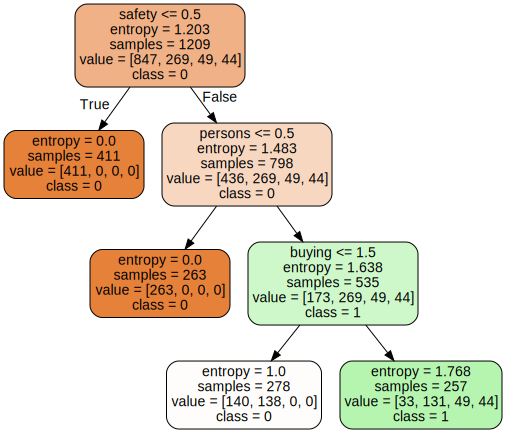

In [33]:
graph = graphviz.Source(dot_data)  
graph